In [4]:
# Packages
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint
import math

from utility_code.utility import utils

#import csvs
train = pd.read_csv("ucla2020-cs145-covid19-prediction/train.csv")
test = pd.read_csv("ucla2020-cs145-covid19-prediction/test.csv")
graph = pd.read_csv("ucla2020-cs145-covid19-prediction/graph.csv")
dummydata = pd.read_csv("data-test/raw_data_test.csv", skiprows=2, thousands=',')

train['Population'] = train['Confirmed'].divide(train['Incident_Rate'])*1e5
train['Active/Population'] = train['Active'].divide(train['Population'])
train['Deaths/Population'] = train['Deaths'].divide(train['Population'])
train['Active/People_Tested*Population'] = train['Active']/train['People_Tested']*train['Population']
train['Recovered/Population'] = train['Recovered']/train['Population']


confirmed = train['Confirmed'].to_list()
daily = [confirmed[i]-confirmed[i-50] for i in range(len(confirmed)) if i-50 >= 0]
for i in range(50):
    daily.insert(0,0)

train['New_Cases'] = daily

tests = train['People_Tested'].to_list()
dailyTests = [tests[i]-tests[i-50] for i in range(len(tests)) if i-50 >= 0]
for i in range(50):
    dailyTests.insert(0,0)

train['New_Tests'] = dailyTests

train['New_Cases/New_Tests'] = train['New_Cases']/train['New_Tests']

statesdata = {}
states = pd.Series.unique(train['Province_State'])
num_states = len(states)
for s in states:
    statesdata[s] = train.loc[train['Province_State'] == s ,:]

In [261]:
from statsmodels.tsa.arima.model import ARIMA
optparams = None
optmape = 100

for p in [2,4,6,8,10]:
    for diff in [1,2,3,4,5]:
        for q in [1,2,3,4,5]:
            confirmed = statesdata['Alabama']['Confirmed']
            confirmed = confirmed.reset_index()
            confirmed = confirmed.drop(columns=['index'])
            #print(confirmed)
            splitpt = len(confirmed) - 10
            confirmed_train, confirmed_test = confirmed[0:splitpt], confirmed[splitpt:]

            def difference(dataset, interval = 1):
                diff = list()
                for i in range(interval, len(dataset)):
                    value = dataset[i]-dataset[i-interval]
                    diff.append(value)
                return np.array(diff)

            # invert differenced value
            def inverse_difference(history, yhat, interval=1):
                #yhat = np.exp(yhat)
                return yhat + history[-1]

            series = confirmed_train
            X = series.values
            #X = np.log(series.values)
            differenced = difference(X, 1)

            model = ARIMA(X, order=(4, 2, q))
            model_fit = model.fit()
            #print(model_fit.summary())

            start = len(differenced)
            end = len(differenced)+10
            #forecast = model_fit.predict(start = start, end = end, )
            fc= model_fit.predict(start, end)

            #print(p,diff,q)
            mape = MAPE(pd.DataFrame({'Confirmed':fc}), pd.DataFrame(confirmed_test))['Confirmed']
            if mape < optmape:
                optparams = {'p':p, 'd':diff, 'q':q}
                optmape = mape
            


# for t in range(len(confirmed_test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     y = output
#     predictions.append(y)
#     #obs = confirmed_test[t]

    

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

In [262]:
print('Params:', optparams)
print('MAPE:', optmape)

Params: {'p': 2, 'd': 1, 'q': 3}
MAPE: 0.002708442240741531


In [242]:
start = len(differenced)
end = len(differenced)+10
#forecast = model_fit.predict(start = start, end = end, )
fc= model_fit.predict(start, end)

In [255]:
MAPE(pd.DataFrame({'Confirmed':fc}), pd.DataFrame(confirmed_test))

index        0.879510
Confirmed    0.008076
dtype: float64

In [231]:
history = [x for x in X]
#print(history[-1])
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, 1)
    print('Day', day,':', inverted)
    history.append(inverted)
    day+=1

Day 1 : [114722.01526319]
Day 2 : [115653.72950221]
Day 3 : [116678.61223306]
Day 4 : [117760.12147352]
Day 5 : [118791.29901588]
Day 6 : [119836.44718097]
Day 7 : [120895.14942917]
Day 8 : [121916.96869413]
Day 9 : [122929.20828124]
Day 10 : [123960.35445294]
Day 11 : [124990.1773984]


In [130]:
confirmed_test

,Confirmed
132,114532
133,115060
134,116710
135,117242
136,119254
137,121023
138,122185
139,123889
140,125235
141,126058


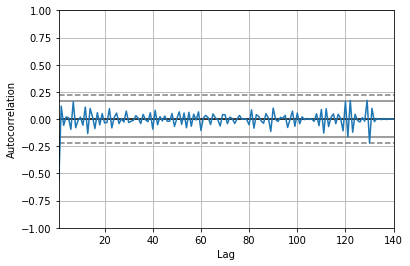

In [12]:
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i]-dataset[i-interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    #yhat = np.exp(yhat)
    return yhat + history[-1]


days = 26
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima.model import s

proj = {}
for s in states:
    a = statesdata[s]
    a = a.reset_index()
    confirmed = a['Confirmed']
    deaths = a['Deaths']
    
    X = confirmed.values
    differencedC = difference(X, 2)

    #modelC = 
    modelC = ARIMA(X, order=(5,2,3))
    model_fitC = modelC.fit()
    start = len(X)
    forecastC = model_fitC.predict(start = start, end = start + days)
#     print(model_fit.summary())
    
#     predictionC = []
#     history = [x for x in X]
#     #print(history[-1])
#     day = 1
#     for yhat in forecastC:
#         inverted = inverse_difference(history, yhat, 1)
#         predictionC.append(inverted)
# #         print('Day', day,':', math.exp(inverted))
#         history.append(inverted)
#         day+=1
        
    Y= deaths.values
    differencedD = difference(Y, 2)

    modelD = ARIMA(Y, order=(5,2,3))
    model_fitD = modelD.fit()
    start = len(Y)
    forecastD = model_fitD.predict(start = start, end = start + days)
#     print(model_fit.summary())
    
#     predictionD = []
#     history = [y for y in Y]
#     #print(history[-1])
#     day = 1
#     for yhat in forecastD:
#         inverted = inverse_difference(history, yhat, 1)
#         predictionD.append(inverted)
# #         print('Day', day,':', math.exp(inverted))
#         history.append(inverted)
#         day+=1
    
    df = {'Confirmed': forecastC, 'Deaths': forecastD}
    
    proj[s] = pd.DataFrame(df)
    
# for t in range(len(confirmed_test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     y = output
#     predictions.append(y)
#     #obs = confirmed_test[t]

    

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maxi

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

In [13]:
order = test.loc[0:49,'Province_State']
test

# format submission
conf = []
dead = []
fid = 0
for i in range(days):
    for j in order:
        projection = proj[j].iloc[i]
        #print(j, 'day', i)
        conf.append(int(projection['Confirmed']))
        dead.append(int(projection['Deaths']))
        #print(fid)
        fid+=1
    
    

In [14]:
test['Confirmed'] = conf
test['Deaths'] = dead

In [15]:
submission = test.drop(columns=['Province_State', 'Date'])
submission

,ForecastID,Confirmed,Deaths
0,0,127516,2194
1,1,5315,37
2,2,202326,5065
3,3,61703,812
4,4,718134,13142
...,...,...,...
1295,1295,146220,2910
1296,1296,87403,2101
1297,1297,14167,313
1298,1298,92762,1270


In [290]:
#submission.to_csv('team31-dec3-1.csv', index = False, header = True)

In [65]:
def MAPE(pred, valid):
    pred = pred.reset_index()
    valid = valid.reset_index()
    pred = pred.astype('int64')
    valid = valid.astype('int64')
    v = pred.subtract(valid)
    v = v.divide(valid)
    v = v.abs()
    v = v.sum(axis = 0)
    #print(v)
    #v = v[1]+v[2]
    n = len(pred)
    #print(len(pred))
    return v/(2*n)

MAPE(submission[['Confirmed', 'Deaths']], validation[['Confirmed', 'Deaths']])

index        0.018783
Confirmed    0.000040
Deaths       0.000090
dtype: float64

In [11]:
MAPE(pd.DataFrame({'Confirmed':[1, 2], 'Dead': [0, 2]}), pd.DataFrame({'Confirmed':[1, 4], 'Dead': [0, 3]}))

index        0.000000
Confirmed    0.250000
Dead         0.166667
dtype: float64

In [17]:
trainrd2 = pd.read_csv("train_round2.csv")


datestofind = trainrd2['Date'] == '09-01-2020'
start = datestofind[datestofind == True].index[0]
datestofind2 = trainrd2['Date'] == '09-26-2020'
end = datestofind[datestofind == True].index[49]

validation = trainrd2.iloc[start:end,:]
validation

,ID,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
7100,7100,Alabama,09-01-2020,127616,2200,48028.0,77388.0,2602.716398,958920.0,NaN,1.723922,19557.083814,NaN
7101,7101,Alaska,09-01-2020,5297,39,2246.0,3012.0,724.083959,374255.0,NaN,0.736266,51159.532223,NaN
7102,7102,Arizona,09-01-2020,202342,5044,30841.0,166457.0,2779.912998,1208990.0,NaN,2.492809,16609.932767,NaN
7103,7103,Arkansas,09-01-2020,61497,814,55647.0,5036.0,2037.806299,731025.0,NaN,1.323642,24223.740177,NaN
7104,7104,California,09-01-2020,715617,13150,NaN,702467.0,1811.128167,11470696.0,NaN,1.837575,29030.753344,NaN
7105,7105,Colorado,09-01-2020,57755,1946,5953.0,49856.0,1002.911055,1009970.0,NaN,3.369405,17538.050017,NaN
7106,7106,Connecticut,09-01-2020,53006,4466,8967.0,39573.0,1486.724631,1192338.0,NaN,8.425461,33442.973876,NaN
7107,7107,Delaware,09-01-2020,17535,605,9419.0,7511.0,1800.744328,238423.0,NaN,3.450242,24484.680066,NaN
7108,7108,Florida,09-01-2020,631040,11374,NaN,619666.0,2938.112148,4675866.0,NaN,1.802421,21770.757320,NaN
7109,7109,Georgia,09-01-2020,272697,5733,NaN,266964.0,2568.391596,2368498.0,NaN,2.102333,22307.654127,NaN


In [98]:
# optmapeC = 100
# optmapeD = 100
# FOR PARAMETER SCANNING ONLY

def predictARIMA(X, p, d, q, days):
    model = ARIMA(X, order=(p,d,q))
    model_fit = model.fit()
    start = len(X)
    forecast = model_fit.predict(start = start, end = start + days)
    return(forecast)

days = 10
mapes = {}
stateparams = {}
for s in states:
    statemape_optC = 100
    statemape_optD = 100
    optstatesparamsC = {}
    optstatesparamsD = {}
#     for p in [5]:
#         for d in [2]:
#             for q in [3]:
    for p in [2,4,6,8]:
        for d in [1,2,3]:
            for q in [2,3,4,5]:
                
                a = statesdata[s]
                a = a.reset_index()
                confirmed = a['Confirmed']
                deaths = a['Deaths']

                splitpt = len(confirmed) - days
                confirmed_train, confirmed_test = confirmed[0:splitpt], confirmed[splitpt:]


                X = confirmed_train.values

                forecastC = predictARIMA(X, p,d,q, days) 
            
                deaths_train, deaths_test = deaths[0:splitpt], deaths[splitpt:]
          

                Y= deaths_train.values
                forecastD = predictARIMA(Y, p,d,q, days)

                df = {'Confirmed': forecastC, 'Deaths': forecastD}
                df = pd.DataFrame(df)
              
                mapeC = MAPE(df['Confirmed'], pd.DataFrame(confirmed_test))['Confirmed']
    
                mapeD = MAPE(df['Deaths'], pd.DataFrame(deaths_test))['Deaths']
                
                if mapeC < statemape_optC:
                    optstatesparamsC =  {'p':p, 'd':d, 'q':q}
                    statemape_optC = mapeC
                    
                if mapeD < statemape_optD:
                    optstatesparamsD =  {'p':p, 'd':d, 'q':q}
                    statemape_optD = mapeD
                
                pars = str(p) + ',' + str(d) + ','+ str(q)
    
                if pars not in mapes:
                    mapes[pars] = (mapeC + mapeD)/2
                else:
                    mapes[pars] += (mapeC+mapeD)/2 
                    
    stateparams[s] = (optstatesparamsC, optstatesparamsD)
    

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maxi

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Aditya/anaconda3/l

LinAlgError: LU decomposition error.

In [96]:
statepars = pd.DataFrame(stateparams)
statepars.to_csv("StateParametersARIMA.csv")
mapes = pd.DataFrame(mapes)
mapes.to_csv("ParameterMAPEs.csv")

ValueError: If using all scalar values, you must pass an index

In [99]:
stateparams

{'Alabama': ({'d': 1, 'p': 6, 'q': 2}, {'d': 3, 'p': 8, 'q': 3}),
 'Alaska': ({'d': 2, 'p': 2, 'q': 3}, {'d': 3, 'p': 2, 'q': 3}),
 'Arizona': ({'d': 2, 'p': 8, 'q': 4}, {'d': 2, 'p': 6, 'q': 2}),
 'Arkansas': ({'d': 2, 'p': 8, 'q': 3}, {'d': 3, 'p': 2, 'q': 4}),
 'California': ({'d': 1, 'p': 6, 'q': 2}, {'d': 1, 'p': 6, 'q': 3}),
 'Colorado': ({'d': 2, 'p': 2, 'q': 3}, {'d': 1, 'p': 4, 'q': 4}),
 'Connecticut': ({'d': 3, 'p': 2, 'q': 4}, {'d': 2, 'p': 6, 'q': 5}),
 'Delaware': ({'d': 3, 'p': 6, 'q': 2}, {'d': 3, 'p': 4, 'q': 2})}

In [101]:
min(mapes, key=mapes.get)

'8,3,3'

In [102]:
mapes['8,3,3']

0.04787750129682709